In [1]:
import sys
import os
import networkx as nx
sys.path.append(os.path.join(os.getcwd(), '..'))

In [2]:
from ConuForecast.src.graph_utils_copy import GraphInit, DBconnector

conn = DBconnector('172.18.0.1', 5555, 'base-ina', 'postgres', 'postgres')

MODEL = 'model_007'
EVENT = '007'
PRECIP = 'precipitation_007'

conu_basin = GraphInit(model=MODEL, event=EVENT, precip=PRECIP, conn=conn)

In [ ]:
import pandas as pd
pd.DataFrame([(conu_basin.subgraphs[f'007_NODO2345_{time}_acc'].nodes()['NODO2345']['elapsed_time'], conu_basin.subgraphs[f'007_NODO1008_{time}_acc'].nodes()['NODO1008']['area_aporte_ha']) for time in (sorted(conu_basin.time_range[1])[3::8])]).set_index(0).plot()

<AxesSubplot:xlabel='0'>

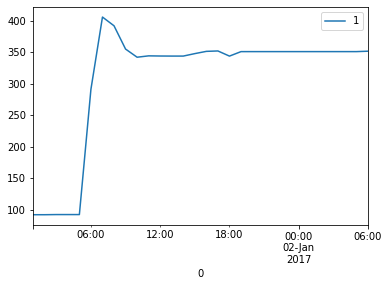

In [4]:
conu_basin.subgraphs_timeseries('NODO123', 'area_aporte_ha', ).plot()

In [ ]:
import torch
import torch_geometric
from torch_geometric import nn
from torch_geometric.utils.convert import from_networkx

import pandas as pd
import numpy as np

In [ ]:
graph.select_attrs({'nodes': ['target', 'lateral_inflow'], 'edges': ['flow_rate']})
data = from_networkx(graph.pruned_digraph)

In [ ]:
data.target

In [ ]:
data

In [ ]:
torch.nn(np.matrix(pd.DataFrame(graph.nodal_data_dict).T[['lateral_inflow', 'rainfall']]))

In [ ]:
nx.attr_matrix(a, node_attr='depth_above_invert')[0]

In [ ]:
torch.tensor([i for i in graph.nodal_data_query_result])